**NOTE** `phimats_rve` environment should be used as kernel

In [6]:
import numpy as np
from datetime import datetime
import h5py

import matplotlib.pyplot as plt
from matplotlib import rc, rcParams, cm
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Arial']})
rcParams['text.latex.preamble'] = r"\usepackage{amsmath}"

from importlib import reload

import PHIMATS_RVE
from PHIMATS_RVE import PhaseField
from Initializations import *

In [ ]:
Simul  = 'GB_2D'           # Simulation name
Nx     = 400               # grid points in x-directoin.
Ny     = 400               # grid points in y-direction.
Nz     = 0
iWidth = 20                # interface width in grid points.
dx     = 0.25e-6           # grid point spacing in (m).
NumberOfGrains = 10        # Number of seeds
dt     = 0.005             # time increment in (s).
nSteps = 1000              # Number of time steps.
sTime  = 100               # Output to disk every tSteps. 

# Mobility Data --------------------
sigma = 1
eee = 3.0e+6

PhaseFieldData = {
    "Simul": Simul,
    "Nx": Nx,
    "Ny": Ny,
    "Nz": Nz,
    "iWidth": iWidth,
    "dx": dx,
    "NumberOfGrains": NumberOfGrains,
    "dt": dt,
    "nSteps": nSteps,
    "sTime": sTime,
    "sigma": sigma,
    "eee": eee,
}

In [4]:
def CPlot2D(Cx, dpi=100, cmap='RdBu_r'):
                
    fig, ax = plt.subplots(1, 1, figsize=(1*56.25/25.4, 1.5*56.25/25.4), dpi=dpi, tight_layout=True)
    
    c = ax.contourf(Cx, 256, cmap=cmap, vmin=Cx.min(), vmax=Cx.max())
    cbar = fig.colorbar(c, ax=ax, ticks=np.linspace(Cx.min(), Cx.max(), 4), orientation="horizontal", pad=0.05)

    ax.set_aspect('equal', 'box')
    ax.set_xticks([])
    ax.set_yticks([])

In [5]:
reload(PHIMATS_RVE)
from PHIMATS_RVE import PhaseField


Simulation:  GB2D_RVE_Large
---------------------------------------
Created on: 06-08-2025 13:20:51
Simulation size:  400  x  400  x  0 grid points
Spacing dx: 2.5000e-07 m
Numerical time increment dt: 5.0000e-03 



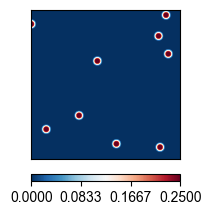

In [6]:
# Create the phase-field object
PF = PhaseField(PhaseFieldData)

# Initialize parent phase
Initializations.Single(PF, 0)

coords = [
	(0, 361),    # negative x → 0
    (40, 79),
    (128, 116),
    (177, 262),
    (361, 385),
    (341, 329),
    (367, 281),
    (345, 31),
    (228, 40)
]

# flipped_coords = [(x, 400 - y) for (x, y) in coords]

for i, (y0, x0) in enumerate(coords, start=1):
	Initializations.Circle(PF, i, x0, y0)


# Calculate interface function gPhi
PF.Calc_gPhi()
# Update grain IDs
PF.UpdateGrain()
PF.getPFID()

# Plot the generated seeds. Make sure they are well separated, otherwise unexpected behavior might result during evolution. 
CPlot2D(PF.gPhi)

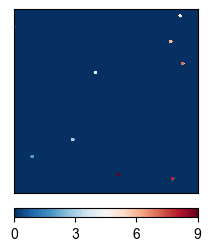

In [7]:
CPlot2D(PF.PhaseFieldID)

In [8]:
# Create hdf5 file to store simulation data and results.
PF.WriteInputData()    

In [ ]:
# Run the phase-field simulation
for iStep in range(1, 60000+1):
    
    # Solve
    PF.UpdateTimeStep()
    
    # Write output results every 500 increments
    if iStep % 500 == 0:

        PF.Calc_gPhi()
        PF.getPFID()
        PF.WriteResults(iStep)
        
        now = datetime.now()
        dt_string = now.strftime("%d-%m-%Y %H:%M:%S")
        print("Write time step:", iStep, "on", dt_string)
        print()

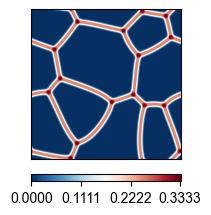

In [11]:
CPlot2D(PF.gPhi)

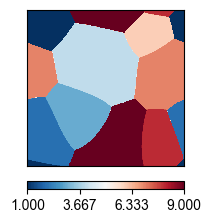

In [10]:
CPlot2D(PF.PhaseFieldID)